In [1]:
import os
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

%matplotlib inline

np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})

# import sys
# !conda list Check the packages installed

### 4. Loading the Raw Data

In [2]:
# Loading the data
# raw_data = pd.read_csv('F:\\Github\\Python tutorials\\Introduction to ML - Logistic Regression\\Logistic Regression Dummy Data v3.csv')
df = pd.read_csv(r"C:\Users\rwand\postmaster\Projects\lr_data.csv")
# print the shape
print(df.shape)

#runs the first 5 rows
df.head(5)

(1006, 14)


,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
0,No Data,critical,Learning / Edu purposes,2116.0,0-200,5-7 Years,Male,No,Property - Real Estate,47.0,House Owner,Services,No,No
1,No Data,critical,TV,2438.0,No Data,7+ Years,Male,No,Savings Account,52.0,House Owner,Skilled Labor,No,No
2,No Data,critical,Buying a New Car,2144.0,0-200,2-5 Years,Male,No,Vehicle,48.0,House Owner,Skilled Labor,No,No
3,No Data,critical,Home furniture,2073.0,No Data,2-5 Years,Married,No,Vehicle,25.0,House Owner,Skilled Labor,Yes,No
4,No Data,critical,Support for Business,1276.0,No Data,7+ Years,Male,No,No Security,59.0,Renting,Services,No,No


## 5. Data Preprocessing

### 5.1. Exploratory Data Analysis

In [3]:
# Checking for null values

df.isnull().sum()

Type of Account          2
Account History          2
Reason for the Loan      3
Loan Amount              3
Account Savings          4
Employment History       5
Individual Stauts        5
Other Loans              5
Security / Collateral    5
Age                      4
Residence Status         4
Job                      4
Completed Other loan?    4
Good Loan                5
dtype: int64

In [4]:
# Visualize the NULL observations

df[df['Employment History'].isnull()]

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
686,Type C,Good,Buying a New Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
721,Type C,critical,Home furniture,5387.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737,Type C,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,House Owner,Services,No,NaN
1005,NaN,NaN,NaN,1765.0,0-201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Deleting the NULL values
df = df.dropna(subset = ['Employment History'])

# Printing the shape
print(df.shape)

# Visualize the NULL observations
df.isnull().sum()

(1001, 14)


Type of Account          0
Account History          0
Reason for the Loan      0
Loan Amount              0
Account Savings          0
Employment History       0
Individual Stauts        0
Other Loans              0
Security / Collateral    0
Age                      0
Residence Status         0
Job                      0
Completed Other loan?    0
Good Loan                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001 entries, 0 to 1003
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Type of Account        1001 non-null   object 
 1   Account History        1001 non-null   object 
 2   Reason for the Loan    1001 non-null   object 
 3   Loan Amount            1001 non-null   float64
 4   Account Savings        1001 non-null   object 
 5   Employment History     1001 non-null   object 
 6   Individual Stauts      1001 non-null   object 
 7   Other Loans            1001 non-null   object 
 8   Security / Collateral  1001 non-null   object 
 9   Age                    1001 non-null   float64
 10  Residence Status       1001 non-null   object 
 11  Job                    1001 non-null   object 
 12  Completed Other loan?  1001 non-null   object 
 13  Good Loan              1001 non-null   object 
dtypes: float64(2), object(12)
memory usage: 117.3+ KB


In [7]:
# Investigate all the elements whithin each Feature 

for column in df:
    unique_values = np.unique(df[column])
    nr_values = len(unique_values)
    if nr_values <= 10:
        print("The number of values for feature {} is: {} -- {}".format(column, nr_values, unique_values))
    else:
        print("The number of values for feature {} is: {}".format(column, nr_values))

The number of values for feature Type of Account is: 4 -- ['No Data' 'Type A' 'Type B' 'Type C']
The number of values for feature Account History is: 3 -- ['Average (known delays)' 'Good' 'critical']
The number of values for feature Reason for the Loan is: 10 -- ['Advance Edu/training' 'All other' 'Buying a New Car' 'Buying a Used Car'
 'Home Devices' 'Home furniture' 'Learning / Edu purposes' 'Renovation'
 'Support for Business' 'TV']
The number of values for feature Loan Amount is: 911
The number of values for feature Account Savings is: 5 -- ['0-200' '1000+' '200-500' '500-1000' 'No Data']
The number of values for feature Employment History is: 5 -- ['0-2 Years' '2-5 Years' '5-7 Years' '7+ Years' 'Unemployed']
The number of values for feature Individual Stauts is: 5 -- ['Divorced' 'Female' 'Female_' 'Male' 'Married']
The number of values for feature Other Loans is: 2 -- ['No' 'Yes']
The number of values for feature Security / Collateral is: 4 -- ['No Security' 'Property - Real Estat

In [8]:
# Visualize the data using seaborn Pairplots

# g = sns.pairplot(df)

# Notes: Do not run this on a big dataset. Filter the columns first

### 5.2. Data Cleaning

In [9]:
df.sort_values(by='Age', ascending=False)

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
679,Type C,Good,Home furniture,-548541254.0,No Data,Unemployed,Female_,No,Vehicle,327.0,House Owner,Skilled Labor,Yes,Yes
822,Type C,Good,Buying a New Car,1394.0,No Data,Unemployed,Female,No,Savings Account,75.0,House Owner,Professional / Management,No,Yes
91,No Data,critical,Support for Business,4534.0,0-200,2-5 Years,Male,No,Property - Real Estate,75.0,House Owner,Professional / Management,No,No
204,Type A,critical,Buying a New Car,1305.0,0-200,2-5 Years,Male,No,Property - Real Estate,74.0,House Owner,Not Employed,Yes,No
769,Type C,critical,Buying a Used Car,6626.0,0-200,Unemployed,Male,No,No Security,73.0,Free,Professional / Management,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,Type C,critical,Home furniture,1055.0,0-200,0-2 Years,Female,No,Savings Account,19.0,Renting,Skilled Labor,No,No
835,Type C,Good,Home furniture,2054.0,0-200,2-5 Years,Female,No,Property - Real Estate,18.0,Renting,Skilled Labor,No,No
515,Type B,Average (known delays),TV,599.0,0-200,2-5 Years,Married,Yes,Property - Real Estate,18.0,Renting,Skilled Labor,No,No
158,Type A,critical,Home furniture,3637.0,No Data,7+ Years,Male,Yes,No Security,18.0,Renting,Skilled Labor,No,No


In [10]:
# Deleting the outlier

df = df[df['Age'] < 100]

df.shape

(1000, 14)

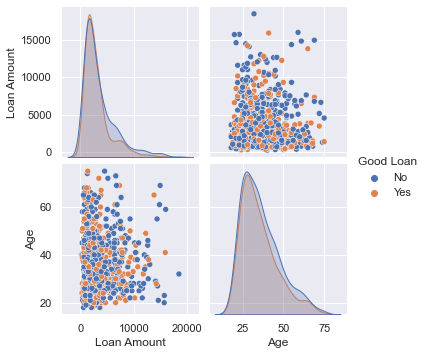

In [11]:
# Visualize the data using seaborn Pairplots

g = sns.pairplot(df, hue = 'Good Loan')


<AxesSubplot:xlabel='Good Loan', ylabel='count'>

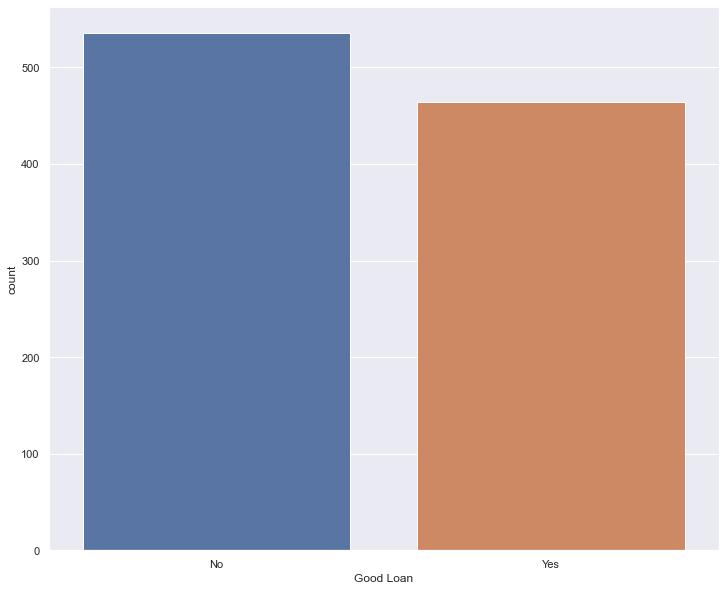

In [12]:
# Investigating the distr of y

sns.countplot(x = 'Good Loan', data = df)

In [13]:
df.columns

Index(['Type of Account', 'Account History', 'Reason for the Loan',
       'Loan Amount', 'Account Savings', 'Employment History',
       'Individual Stauts', 'Other Loans', 'Security / Collateral', 'Age',
       'Residence Status', 'Job', 'Completed Other loan?', 'Good Loan'],
      dtype='object')

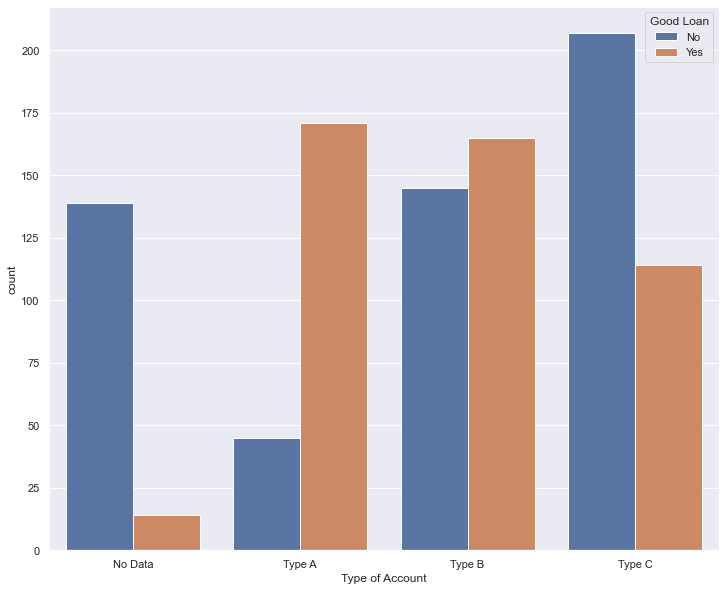

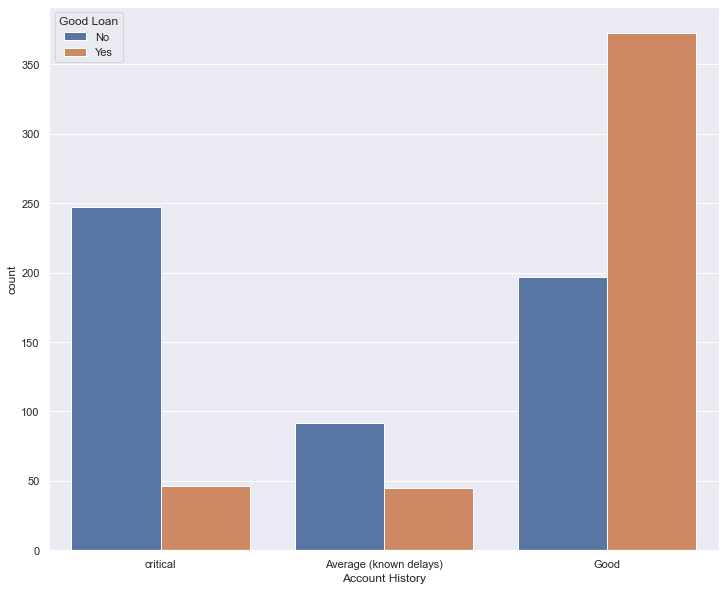

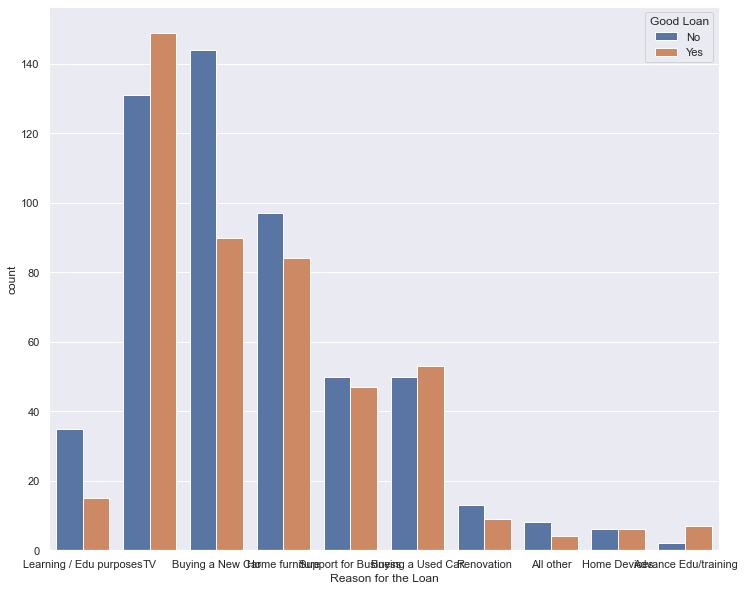

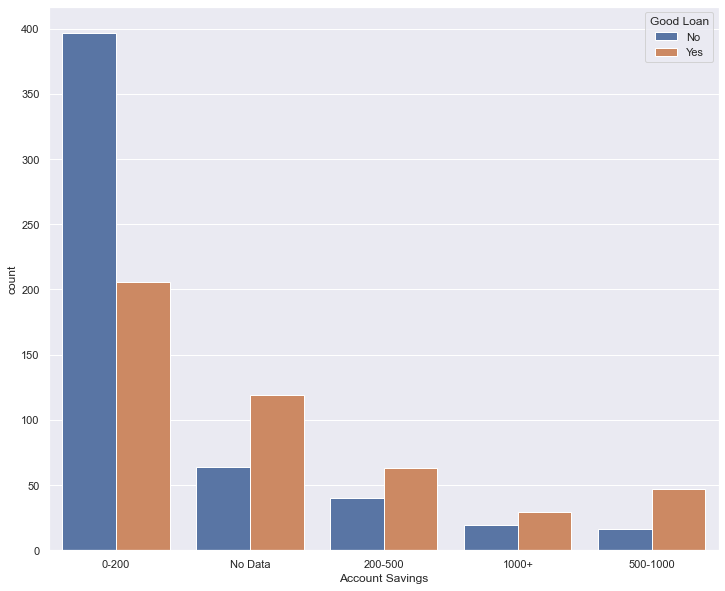

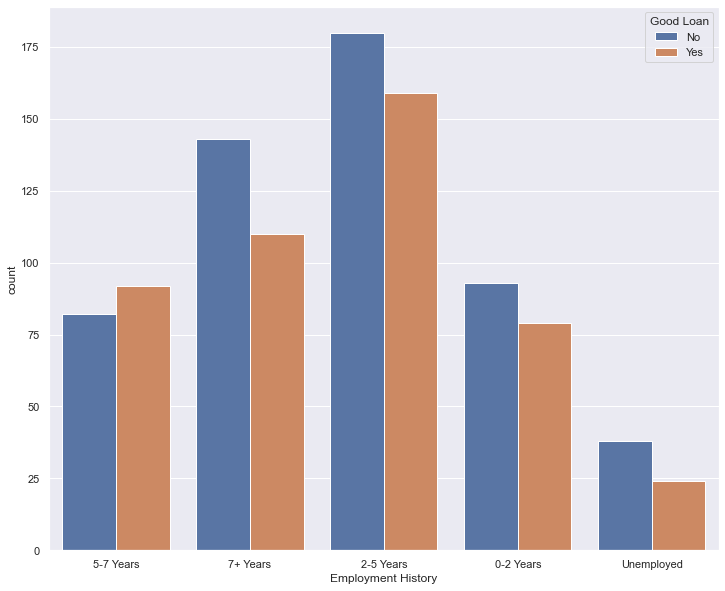

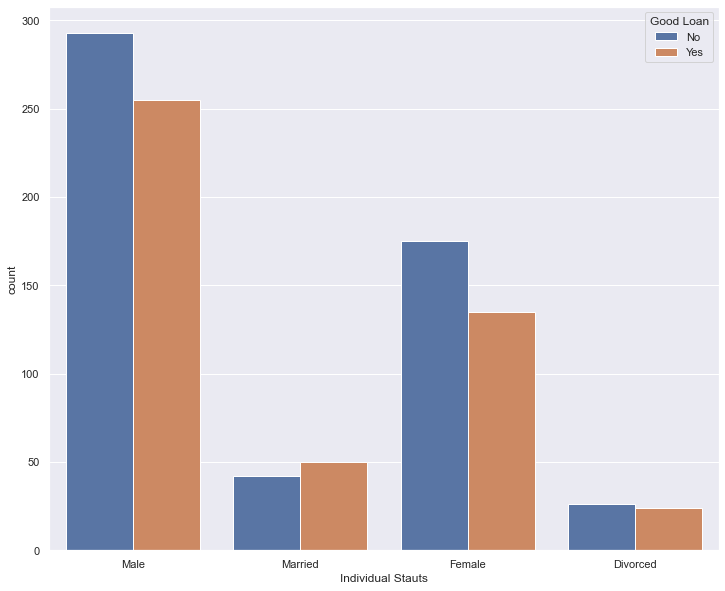

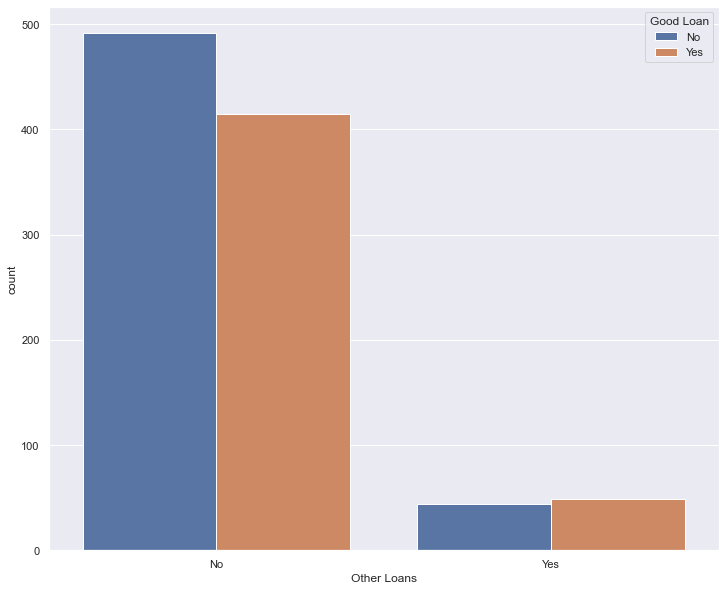

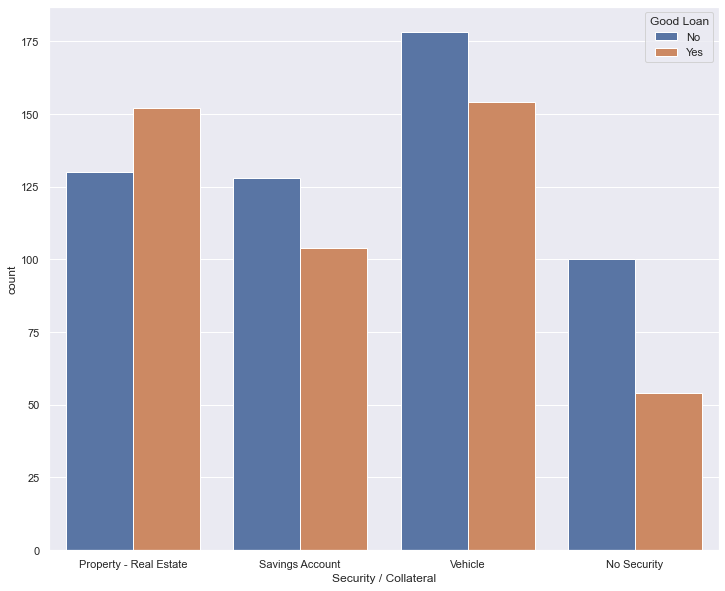

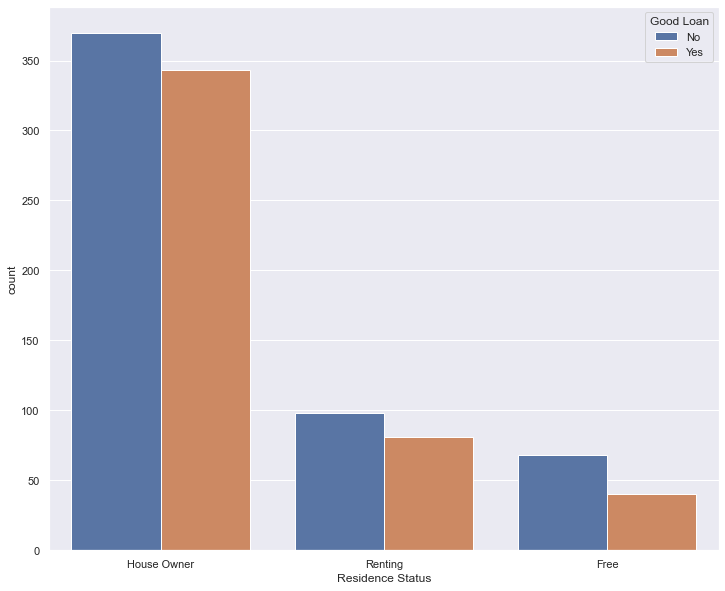

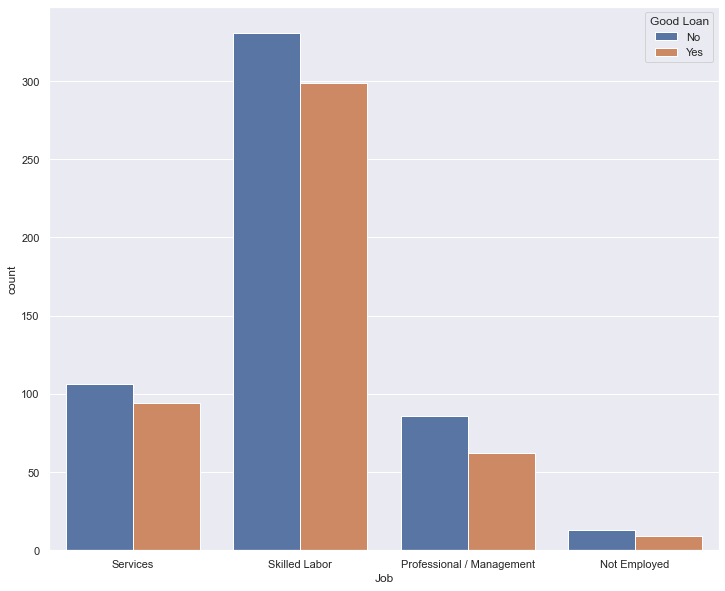

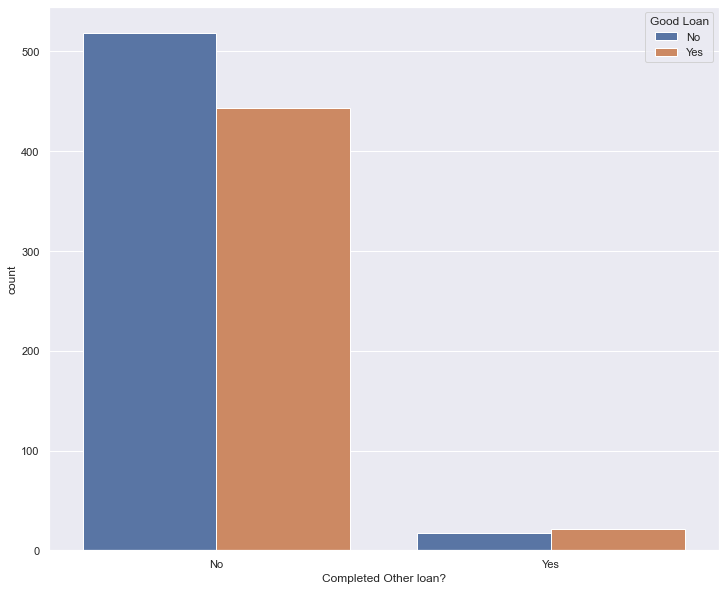

In [14]:
# Looping through all the features by our y variable - see if there is relationship

features = ['Type of Account', 'Account History', 'Reason for the Loan',
       'Account Savings', 'Employment History',
       'Individual Stauts', 'Other Loans', 'Security / Collateral',
       'Residence Status', 'Job', 'Completed Other loan?']

for f in features:
    sns.countplot(x = f, data = df, hue = 'Good Loan')
    plt.show()

In [15]:
df.head()

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
0,No Data,critical,Learning / Edu purposes,2116.0,0-200,5-7 Years,Male,No,Property - Real Estate,47.0,House Owner,Services,No,No
1,No Data,critical,TV,2438.0,No Data,7+ Years,Male,No,Savings Account,52.0,House Owner,Skilled Labor,No,No
2,No Data,critical,Buying a New Car,2144.0,0-200,2-5 Years,Male,No,Vehicle,48.0,House Owner,Skilled Labor,No,No
3,No Data,critical,Home furniture,2073.0,No Data,2-5 Years,Married,No,Vehicle,25.0,House Owner,Skilled Labor,Yes,No
4,No Data,critical,Support for Business,1276.0,No Data,7+ Years,Male,No,No Security,59.0,Renting,Services,No,No


In [16]:
# Making categorical variables into numeric representation

df_dummy = pd.get_dummies(df, columns = features)

# Notes:
# We can also do this with Label Encoding and OneHotEncoder from the preprocessing library

print(df.shape)
# print the shape
print(df_dummy.shape)

# Creating a new 0-1 y variable
#new_raw_data['Loan Approved2'] = 0
df_dummy['Good Loan'][df_dummy['Good Loan'] == 'Yes'] = 1
df_dummy['Good Loan'][df_dummy['Good Loan'] == 'No'] = 0

# Visualizing the data
df_dummy

(1000, 14)
(1000, 49)


C:\Users\rwand\AppData\Local\Temp\ipykernel_11572\3042866083.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dummy['Good Loan'][df_dummy['Good Loan'] == 'Yes'] = 1
C:\Users\rwand\AppData\Local\Temp\ipykernel_11572\3042866083.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dummy['Good Loan'][df_dummy['Good Loan'] == 'No'] = 0


,Loan Amount,Age,Good Loan,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,...,Security / Collateral_Vehicle,Residence Status_Free,Residence Status_House Owner,Residence Status_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_No,Completed Other loan?_Yes
0,2116.0,47.0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,2438.0,52.0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
2,2144.0,48.0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,1,0
3,2073.0,25.0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,1
4,1276.0,59.0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,3602.0,47.0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
1000,4473.0,35.0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,1,0
1001,12759.0,38.0,1,0,0,0,1,1,0,0,...,1,0,1,0,0,1,0,0,1,0
1002,2551.0,47.0,0,0,0,0,1,1,0,0,...,1,0,1,0,0,0,1,0,1,0


#### Notes:

###### We do not need to normalize / standardize the data in Logistic Regression due to the logistic function (0 or 1)
###### Once a value crosses the decision boundary (0.5 threshold), it saturates
###### After the 0.5 or before, there is no additional value to be added from smaller or larger values
###### more details: https://medium.com/@swethalakshmanan14/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff

## 5.3. Feature Selection
In this example, we do not have many variables so we might use all of the data but in some cases, you have thousands of variables and you will need to filter them in order to save computational time

#### Steps of Running Feature Importance
- Split the data into X & y
- Run a Tree-based estimators (i.e. decision trees & random forests) 
- Run Feature Importance

In [17]:
# Split the data into X & y

X = df_dummy.drop('Good Loan', axis = 1).values
y = df_dummy['Good Loan']

y = y.astype(int)

print(X.shape)
print(y.shape)

(1000, 48)
(1000,)


In [18]:
# Run a Tree-based estimators (i.e. decision trees & random forests)

dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)


DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

#### Notes:
- The importance of a feature is calculated as the (normalized) total reduction of entropy (other criterions too) brought by that feature or the higher information gain
- To understand the maths, read this: https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3

In [19]:
# Running Feature Importance

fi_col = []
fi = []

for i,column in enumerate(df_dummy.drop('Good Loan', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance for Loan Amount is : 0.12122079844891431
The feature importance for Age is : 0.07962988068108864
The feature importance for Type of Account_No Data is : 0.054236275712355064
The feature importance for Type of Account_Type A is : 0.04973253970745607
The feature importance for Type of Account_Type B is : 0.0
The feature importance for Type of Account_Type C is : 0.026698167265803152
The feature importance for Account History_Average (known delays) is : 0.0026219295620499047
The feature importance for Account History_Good is : 0.19131616315491018
The feature importance for Account History_critical is : 0.0
The feature importance for Reason for the Loan_Advance Edu/training is : 0.0
The feature importance for Reason for the Loan_All other is : 0.0
The feature importance for Reason for the Loan_Buying a New Car is : 0.012188194319512301
The feature importance for Reason for the Loan_Buying a Used Car is : 0.00657340597791024
The feature importance for Reason for the L

In [20]:
# Creating a Dataframe
fi_col
fi

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
fi_df


# Ordering the data
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

# Creating columns to keep
columns_to_keep = fi_df['Feature'][0:40]

fi_df

,index,Feature,Feature Importance
0,19,Account Savings_0-200,0.197515
1,7,Account History_Good,0.191316
2,0,Loan Amount,0.121221
3,1,Age,0.079630
4,2,Type of Account_No Data,0.054236
5,3,Type of Account_Type A,0.049733
6,5,Type of Account_Type C,0.026698
7,45,Job_Skilled Labor,0.020597
8,34,Other Loans_Yes,0.017520
9,23,Account Savings_No Data,0.016471


#### Notes:
- Please note that we have not normalised / scale our data
- Please note that we have not done any feature engineering - created new features
- Please note that we have not joined multiple datasets together
- Please note that we have not aggregated any of our data

## 6. Splitting the Raw Data - Hold-out validation

In [21]:
# Print the shapes

print(df_dummy.shape)
print(df_dummy[columns_to_keep].shape)

df_dummy = df_dummy[columns_to_keep]

(1000, 49)
(1000, 40)


In [22]:
df_dummy.head()

,Account Savings_0-200,Account History_Good,Loan Amount,Age,Type of Account_No Data,Type of Account_Type A,Type of Account_Type C,Job_Skilled Labor,Other Loans_Yes,Account Savings_No Data,...,Job_Professional / Management,Completed Other loan?_No,Completed Other loan?_Yes,Reason for the Loan_Learning / Edu purposes,Individual Stauts_Male,Employment History_7+ Years,Security / Collateral_Savings Account,Individual Stauts_Female,Account History_Average (known delays),Residence Status_Renting
0,1,0,2116.0,47.0,1,0,0,0,0,0,...,0,1,0,1,1,0,0,0,0,0
1,0,0,2438.0,52.0,1,0,0,1,0,1,...,0,1,0,0,1,1,1,0,0,0
2,1,0,2144.0,48.0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,0,2073.0,25.0,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1276.0,59.0,1,0,0,0,0,1,...,0,1,0,0,1,1,0,0,0,1


## Split the data into X & y

X = df_dum.drop('Churn', axis = 'columns')
y = df_dum.Churn

X = new_raw_data[columns_to_keep].values
X

y = new_raw_data['Good Loan']
y = y.astype(int)
y

print(X.shape)
print(y.shape)

In [23]:
# Hold-out validation

# first one
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=15)

# Second one

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size = 0.5, random_state=15)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

# Official Doc: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

(800, 48)
(100, 48)
(100, 48)
(800,)
(100,)
(100,)


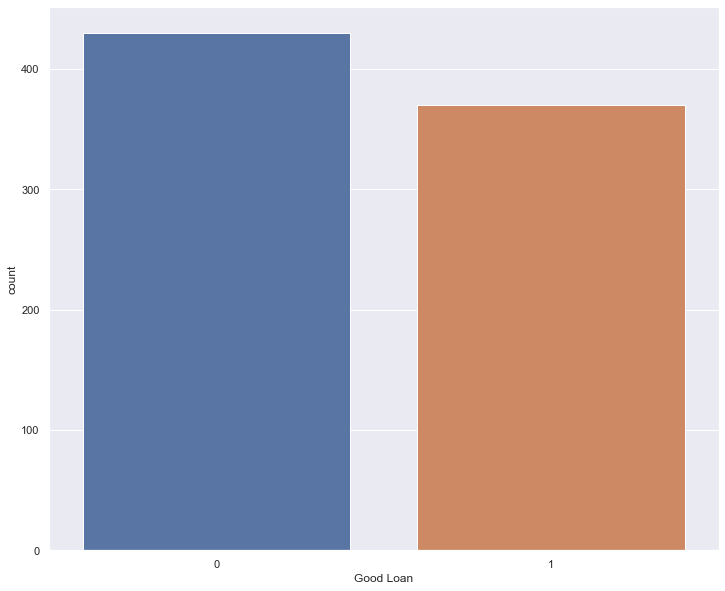

In [24]:
# Investigating the distr of all ys

ax = sns.countplot(x = y_train)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

## 8. Running Logistic Regression

In [26]:
# Training my model

lr = LogisticRegression(random_state=10, solver = 'lbfgs')

lr.fit(X_train, y_train)

# SKLearn doc: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

C:\Users\rwand\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=10)

In [27]:
# Methods we can use in Logistic

# predict - Predict class labels for samples in X
lr.predict(X_train)
y_pred = lr.predict(X_train)

# predict_proba - Probability estimates
pred_proba = lr.predict_proba(X_train)


# score- Returns the mean accuracy on the given test data and labels - below

## 9. Evaluating the Model

In [28]:
# Accuracy on Train
print("The Training Accuracy is: ", lr.score(X_train, y_train))

# Accuracy on Test
print("The Validation Accuracy is: ", lr.score(X_val, y_val))


# Classification Report
print(classification_report(y_train, y_pred))



The Training Accuracy is:  0.7825
The Validation Accuracy is:  0.75
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       430
           1       0.76      0.77      0.77       370

    accuracy                           0.78       800
   macro avg       0.78      0.78      0.78       800
weighted avg       0.78      0.78      0.78       800



In [29]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

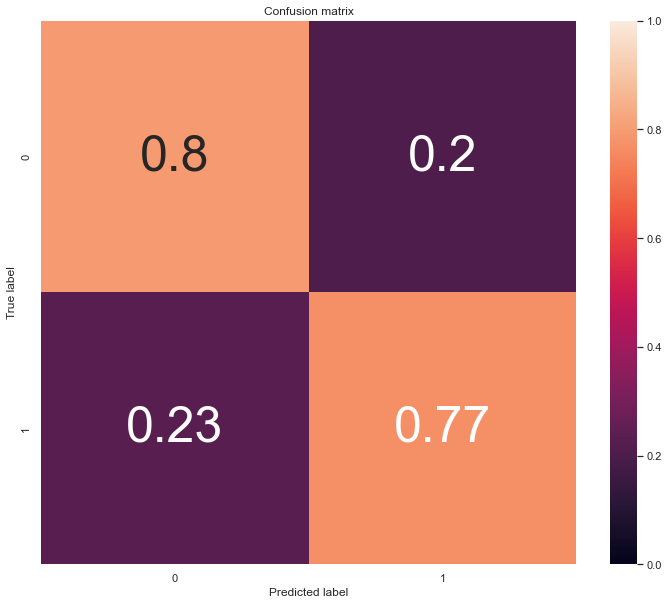

In [30]:
# Visualizing cm

cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = lr.classes_, title='Confusion matrix')

In [31]:
cm.sum(axis=1)
cm_norm

array([[0.795349, 0.204651],
       [0.232432, 0.767568]])

In [32]:
cm

array([[342,  88],
       [ 86, 284]], dtype=int64)

In [33]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)

# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)

##Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)


The True Positive Rate is: [0.795349 0.767568]
The Precision is: [0.799065 0.763441]
The False positive rate is: [0.232432 0.204651]
The False Negative Rate is:  [0.204651 0.232432]

The average TPR is: 0.7814582023884349
The average Precision is: 0.7812531403879007
The average False positive rate is: 0.21854179761156506
The average False Negative Rate is: 0.21854179761156506


In [34]:
from sklearn.pipeline import Pipeline

In [35]:
pipe = Pipeline([('classifier' , RandomForestClassifier())])

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [36]:
# df_cv = pd.DataFrame(best_clf.cv_results_)
# df_cv.head()

In [37]:
best_clf.best_estimator_

Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_features=16, n_estimators=90))])

In [38]:
# Accuracy on Train
print("The Training Accuracy is: ", best_clf.score(X_train, y_train))

# Accuracy on Test
print("The Test Accuracy is: ", best_clf.score(X_test, y_test))

y_pred_tuned = best_clf.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred_tuned))



The Training Accuracy is:  1.0
The Test Accuracy is:  0.77
              precision    recall  f1-score   support

           0       0.85      0.72      0.78        57
           1       0.69      0.84      0.76        43

    accuracy                           0.77       100
   macro avg       0.77      0.78      0.77       100
weighted avg       0.78      0.77      0.77       100



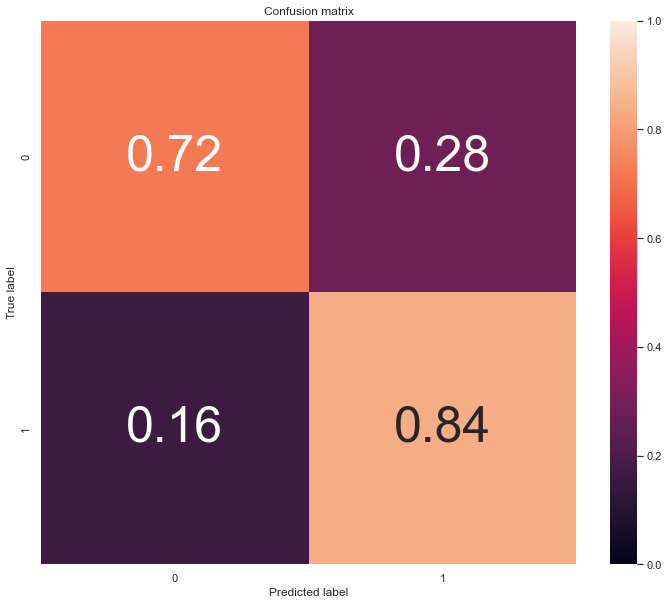

In [40]:
cm_cv = confusion_matrix(y_test, y_pred_tuned)
cm_norm_cv = cm_cv / cm_cv.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm_cv, classes = lr.classes_, title='Confusion matrix')

In [39]:
# Training a Dummy Classifier

from sklearn.dummy import DummyClassifier

dummy_c = DummyClassifier(strategy="most_frequent")
dummy_c.fit(X_train, y_train)
score = dummy_c.score(X_test, y_test)

pred_proba_t = dummy_c.predict_proba(X_test)

print("Testing Acc:", score)


Testing Acc: 0.57


## 11. Final Model with Selected Parameters

#### 

- Option 1: Deploy the model in a CRM System or the Cloud or Viz tools and automaticaly decide if a customer should get his loan approved or not


- Option 2: Analyse the factors that affect a good/bad loan and help the business understand this. Then the business can educate their clients what they need to improve in order to get a loan


- Option 3: Deploy this model in an open bank website where customers can automatically see if their loan will get approved or not; saving time & cost for the bank/business


- Option 4 - What do you think?